# Kong Fig 5; Key Figs 4 and 5

 1. Sea-subsurface => two halfspaces; Kong (2007) Figure 5  
    Rec on interface, src 50 m above
 2. Canonical model; Key (2012) Figure 5  
    1000 m water layer, rec on interface, src 10 m above
 3. Land case

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import empymod as epm

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

### General model parameters

In [3]:
x = np.arange(1, 101)*200
inp = {
    'src': [0, 0, 0],
    'rec': [x, x*0, 0],
    'ab': 11,
    'freqtime': 1,
    'verb': 1,}    

## Kong Figure 5

In [4]:
# Update model
inp['src'][2] = -50
inp['rec'][2] = 0 
inp['depth'] = 0
inp['res'] = [1/3.2, 1]

# Calculate responses
kong241 = epm.dipole(htarg='kong_241_2007', **inp)
key201 = epm.dipole(htarg='key_201_2012', **inp)
and801 = epm.dipole(htarg='anderson_801_1982', **inp)
wer201 = epm.dipole(htarg='wer_201_2018', **inp)
qwe = epm.dipole(ht='qwe', **inp)

* WARNING :: Hankel-quadrature did not converge at least once;
             => desired `atol` and `rtol` might not be achieved.


### Figure

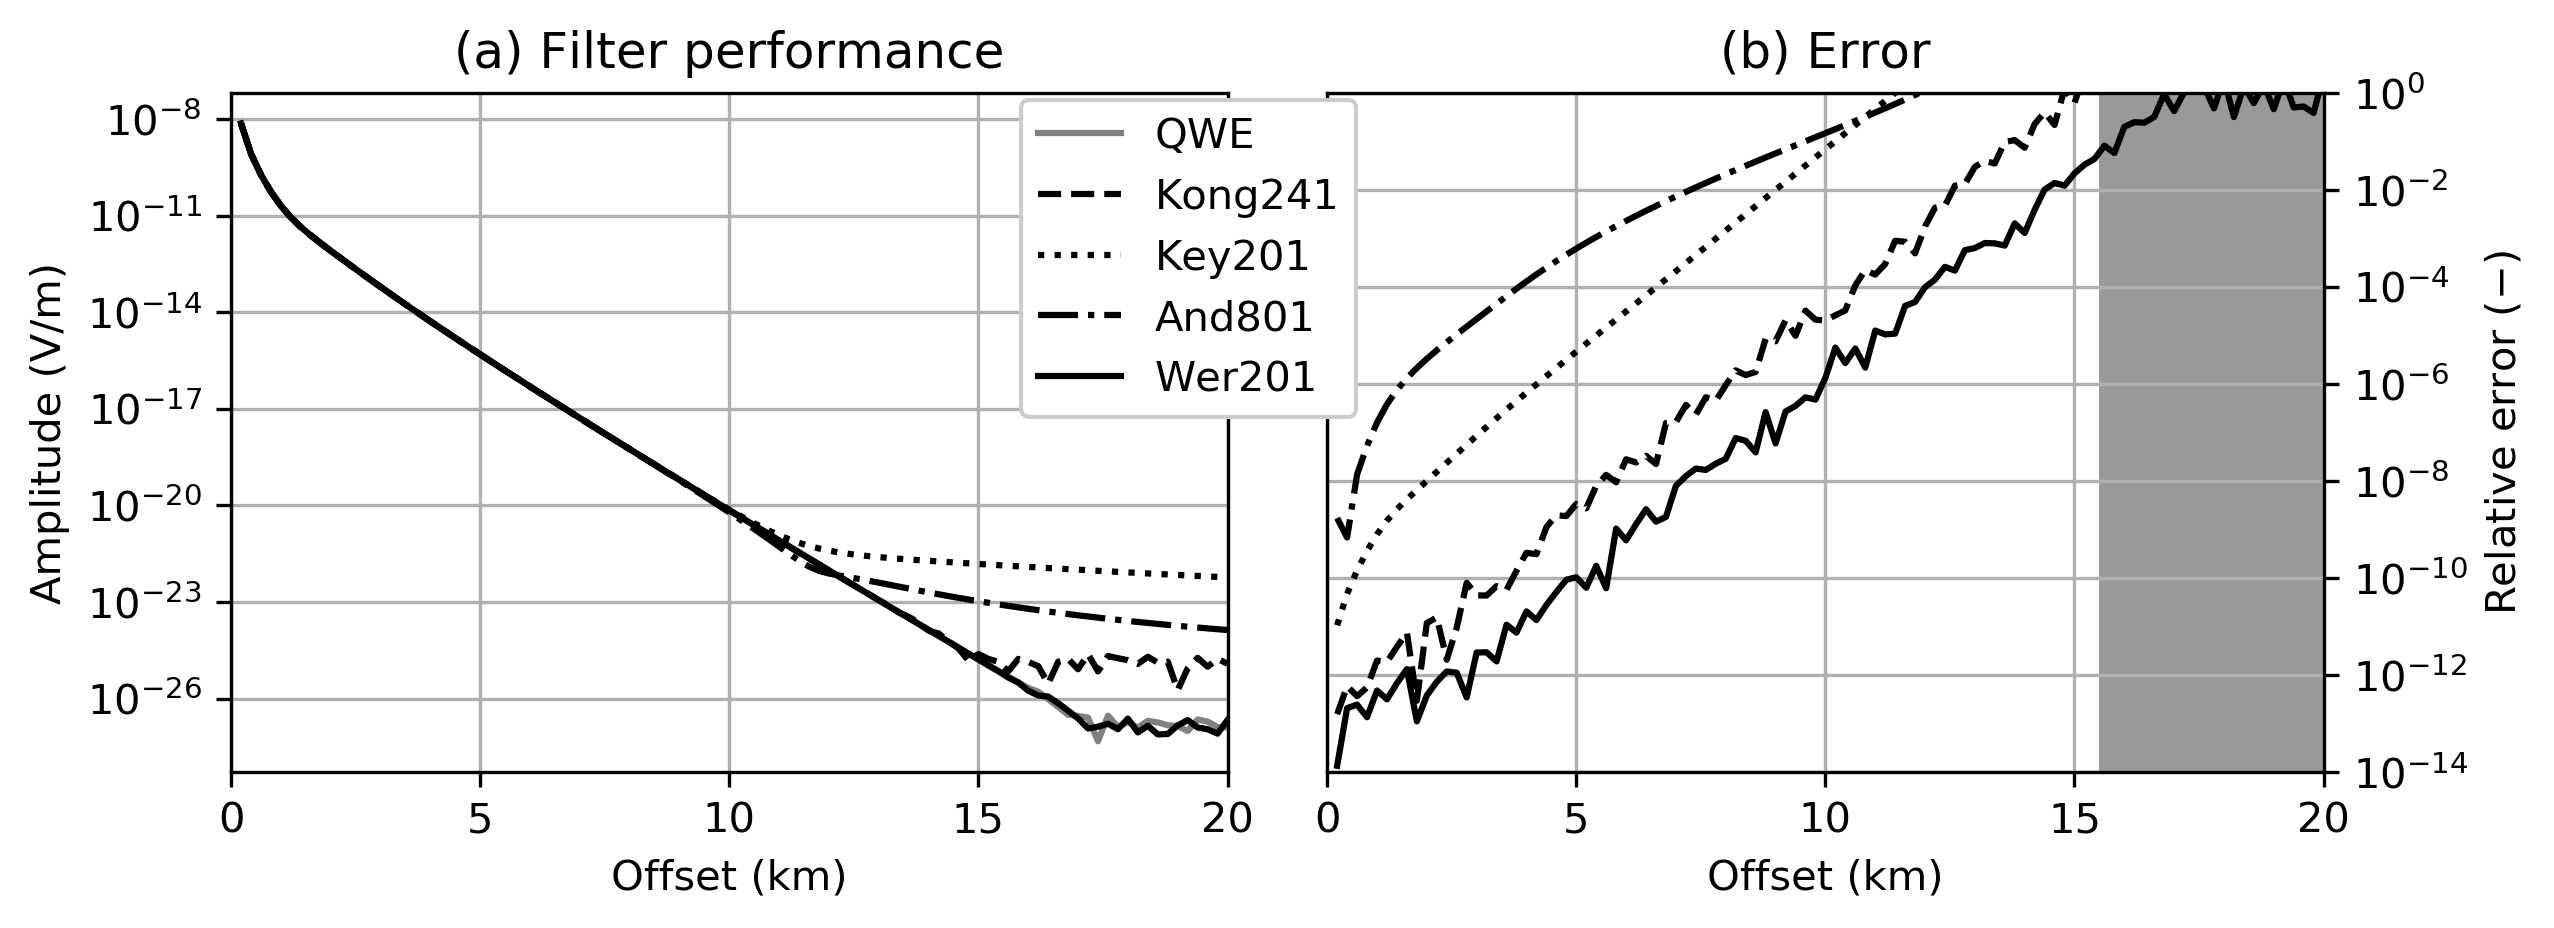

In [5]:
plt.figure(figsize=(9, 3))
plt.subplots_adjust(wspace=0.1)

# (b) Relative error
ax2 = plt.subplot(122)
plt.title('(b) Error')
plt.grid(True)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.semilogy(x/1e3, np.abs((kong241-qwe)/qwe), 'k--', label='Kong241')
plt.semilogy(x/1e3, np.abs((key201-qwe)/qwe), 'k:', label='Key201')
plt.semilogy(x/1e3, np.abs((and801-qwe)/qwe), 'k-.', label='And801')
plt.semilogy(x/1e3, np.abs((wer201-qwe)/qwe), 'k-', label='Wer201')
plt.fill([15.5, 20, 20, 15.5, 15.5], [1e-14, 1e-14, 1, 1, 1e-14], '.6')
#plt.legend()
plt.xlabel('Offset (km)')
plt.ylabel('Relative error ($-$)')
plt.xticks([0, 5, 10, 15, 20])
plt.xlim([0, 20])
plt.ylim([1e-14, 1])

# (a) Amplitude
plt.subplot(121)
plt.title('(a) Filter performance')
plt.grid(True)
plt.semilogy(x/1e3, np.abs(qwe), c='0.5', label='QWE')
plt.semilogy(x/1e3, np.abs(kong241), 'k--', label='Kong241')
plt.semilogy(x/1e3, np.abs(key201), 'k:', label='Key201')
plt.semilogy(x/1e3, np.abs(and801), 'k-.', label='And801')
plt.semilogy(x/1e3, np.abs(wer201), 'k-', label='Wer201')
l = plt.legend(loc=1, bbox_to_anchor=(1.15, 1.02))
l.get_frame().set_alpha(1)
plt.xlabel('Offset (km)')
plt.ylabel('Amplitude (V/m)')
plt.xticks([0, 5, 10, 15, 20])
plt.xlim([0, 20])

# Save and show
plt.savefig('../figures/kongf5.pdf', bbox_inches='tight')
plt.show()

## Key Figure 5 and land case

In [6]:
# 1. Key figure 5

# Update model
inp['src'][2] = 1990
inp['rec'][2] = 2000 
inp['depth'] = [0, 1000, 2000, 2100]
inp['res'] = [1/1e-12, 1/3.3, 1, 100, 1]
inp['epermH'] = [0, 1, 1, 1, 1]
inp['epermV'] = [0, 1, 1, 1, 1]

# Calculate responses
kkong241 = epm.dipole(htarg='kong_241_2007', **inp)
kkey201 = epm.dipole(htarg='key_201_2012', **inp)
kand801 = epm.dipole(htarg='anderson_801_1982', **inp)
kwer201 = epm.dipole(htarg='wer_201_2018', **inp)
kqwe = epm.dipole(ht='qwe', **inp)
      
# 2. Land case

# Update model
inp['src'][2] = 0.5
inp['rec'][2] = 0.8 
inp['depth'] = [0, 1000, 1100]
inp['res'] = [2e14, 10, 500, 10]
inp['epermH'] = [0, 1, 1, 1]
inp['epermV'] = [0, 1, 1, 1]

# Calculate responses
lkong241 = epm.dipole(htarg='kong_241_2007', **inp)
lkey201 = epm.dipole(htarg='key_201_2012', **inp)
land801 = epm.dipole(htarg='anderson_801_1982', **inp)
lwer201 = epm.dipole(htarg='wer_201_2018', **inp)
lqwe = epm.dipole(ht='qwe', **inp)

* WARNING :: Hankel-quadrature did not converge at least once;
             => desired `atol` and `rtol` might not be achieved.


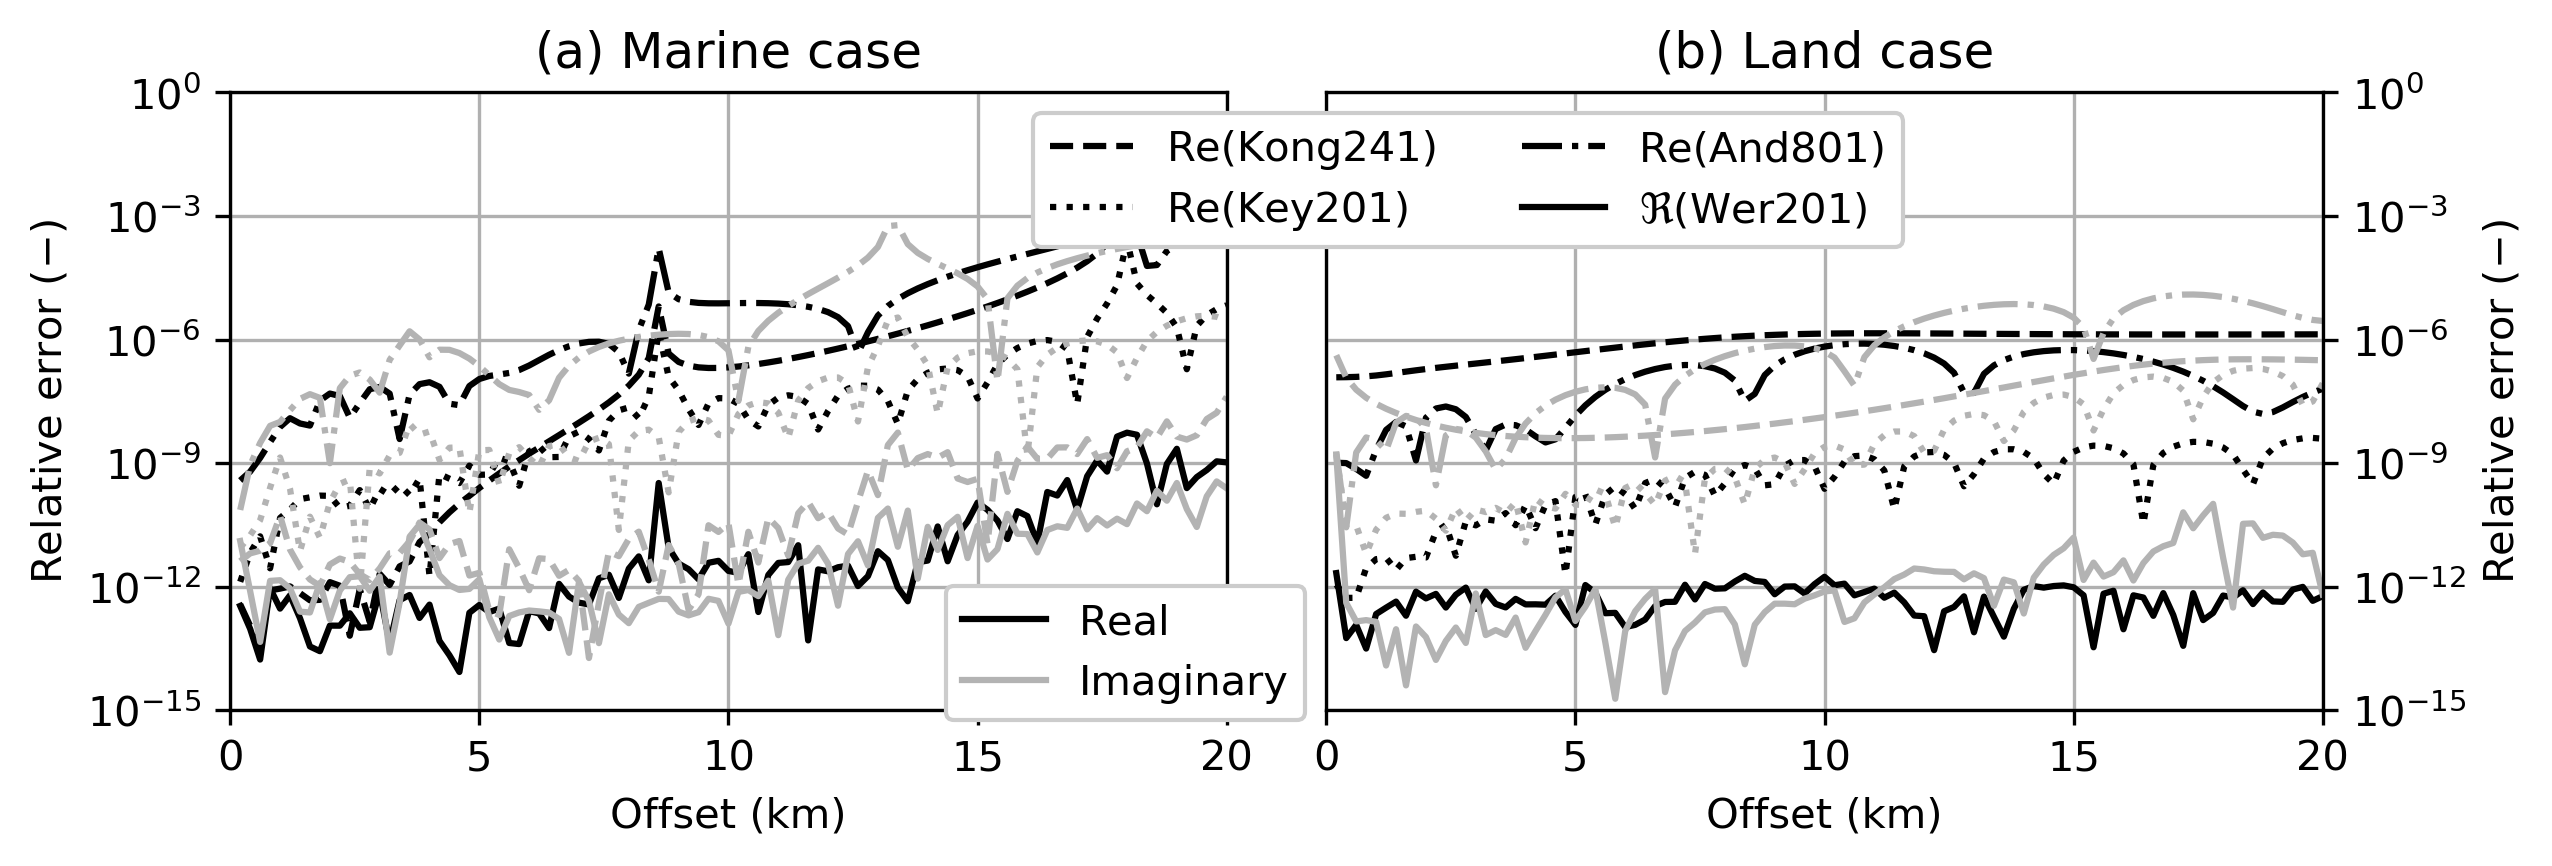

In [7]:
plt.figure(figsize=(9, 6))
plt.subplots_adjust(wspace=0.1)

# (a) Marine case
plt.subplot(221)
plt.title('(a) Marine case')
plt.grid(True)
plt.semilogy(x/1e3, np.abs((kkong241.real-kqwe.real)/kqwe.real), 'k--')
plt.semilogy(x/1e3, np.abs((kkey201.real-kqwe.real)/kqwe.real), 'k:')
plt.semilogy(1e3, 0.1, 'k-', label=r'Real')
plt.semilogy(1e3, 0.1, '-', c='.7', label='Imaginary')
plt.semilogy(x/1e3, np.abs((kand801.real-kqwe.real)/kqwe.real), 'k-.')
plt.semilogy(x/1e3, np.abs((kwer201.real-kqwe.real)/kqwe.real), 'k-')
plt.semilogy(x/1e3, np.abs((kkong241.imag-kqwe.imag)/kqwe.imag), '--', c='.7')
plt.semilogy(x/1e3, np.abs((kkey201.imag-kqwe.imag)/kqwe.imag), ':', c='.7')
plt.semilogy(x/1e3, np.abs((kand801.imag-kqwe.imag)/kqwe.imag), '-.', c='.7')
plt.semilogy(x/1e3, np.abs((kwer201.imag-kqwe.imag)/kqwe.imag), '-', c='.7')
l = plt.legend(loc=4, bbox_to_anchor=(1.1, -.05))
l.get_frame().set_alpha(1)
plt.xticks([0, 5, 10, 15, 20])
plt.xlim([0, 20])
plt.ylim([1e-15, 1e0])
plt.xlabel('Offset (km)')
plt.ylabel('Relative error ($-$)')

# (b) Land case
ax4 = plt.subplot(222)
plt.title('(b) Land case')
plt.grid(True)
plt.gca().yaxis.tick_right()
ax4.yaxis.set_label_position("right")
plt.semilogy(x/1e3, np.abs((lkong241.real-lqwe.real)/lqwe.real), 'k--', label='Re(Kong241)')
plt.semilogy(x/1e3, np.abs((lkey201.real-lqwe.real)/lqwe.real), 'k:', label='Re(Key201)')
plt.semilogy(x/1e3, np.abs((land801.real-lqwe.real)/lqwe.real), 'k-.', label='Re(And801)')
plt.semilogy(x/1e3, np.abs((lwer201.real-lqwe.real)/lqwe.real), 'k-', label=r'$\Re$(Wer201)')
plt.semilogy(x/1e3, np.abs((lkong241.imag-lqwe.imag)/lqwe.imag), '--', c='.7')
plt.semilogy(x/1e3, np.abs((lkey201.imag-lqwe.imag)/lqwe.imag), ':', c='.7')
plt.semilogy(x/1e3, np.abs((land801.imag-lqwe.imag)/lqwe.imag), '-.', c='.7')
plt.semilogy(x/1e3, np.abs((lwer201.imag-lqwe.imag)/lqwe.imag), '-', c='.7')
plt.xticks([0, 5, 10, 15, 20])
plt.xlim([0, 20])
plt.ylim([1e-15, 1e0])
l = plt.legend(ncol=2, loc=1, bbox_to_anchor=(0.6, 1))
l.get_frame().set_alpha(1)
plt.xlabel('Offset (km)')
plt.ylabel('Relative error ($-$)')

# Save and show
plt.savefig('../figures/keyf5.pdf', bbox_inches='tight')
plt.show()

In [8]:
epm.versions('HTML')